The ecommerce company is trying to decide whether to focus their efforts on their mobile app experience or their website.
data set has the data related to their sales, time spent on web site, mobile app and in store session. Target column has a amount spent by the customer over the year. Data set also contains the information about the membership of the customer

## Importing Libraries

In [59]:
import pandas as pd
import numpy as np

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
%matplotlib inline

## Reading Ecommerce data set

In [62]:
Ecom_data = pd.read_csv('Ecommerce Customers')

In [63]:
Ecom_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [64]:
Ecom_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [65]:
Ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory data anaysis

In [66]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

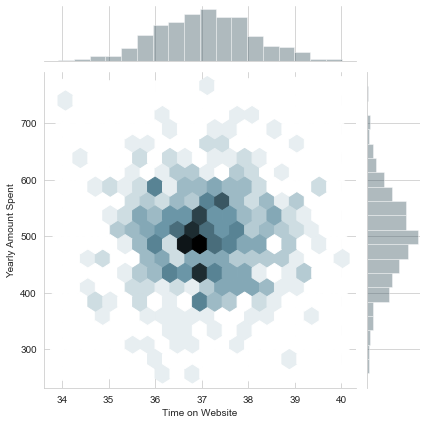

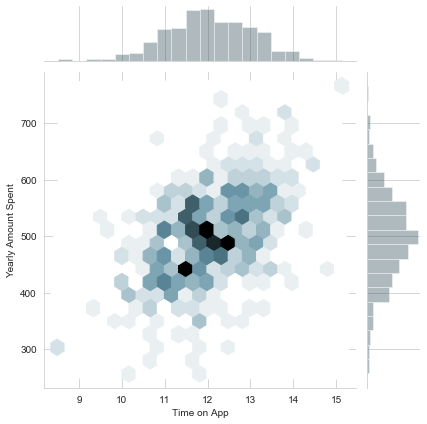

In [67]:
sns.jointplot(x=Ecom_data['Time on Website'],y=Ecom_data['Yearly Amount Spent'],data=Ecom_data,kind='hex')
sns.jointplot(x=Ecom_data['Time on App'],y=Ecom_data['Yearly Amount Spent'],data=Ecom_data,kind='hex')

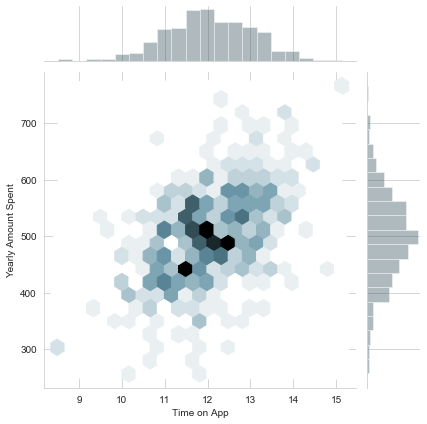

In [68]:
sns.jointplot(x=Ecom_data['Time on App'],y=Ecom_data['Yearly Amount Spent'],data=Ecom_data,kind='hex')

In [69]:
Ecom_data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


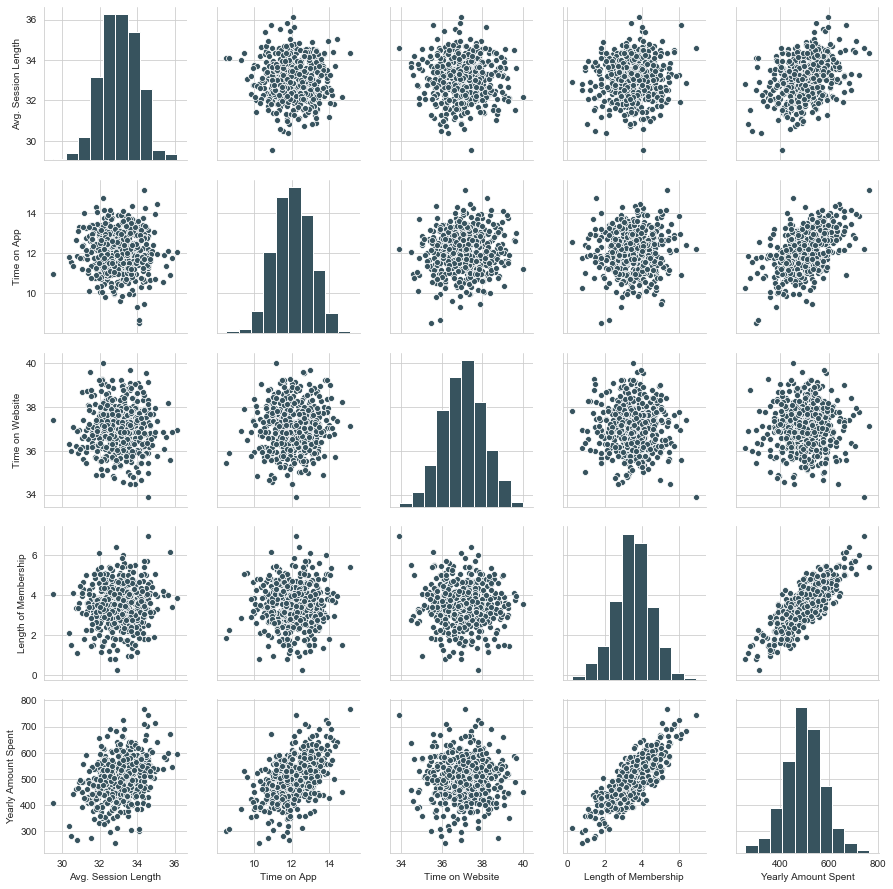

In [70]:
sns.pairplot(Ecom_data,kind='scatter')

In [72]:
#sns.lmplot(y=Ecom_data['Yearly Amount Spent'],x=Ecom_data['Length of Membership'],data=Ecom_data)

In [73]:
Ecom_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Creating Linear Regression model 

In [74]:
y = Ecom_data['Yearly Amount Spent']

In [75]:
X = Ecom_data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [78]:
lmc = LinearRegression()

In [79]:
lmc.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
lmc.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting the sales based on the sales data set

In [81]:
ecom_prediction = lmc.predict(x_test)

In [84]:
coeffecients = pd.DataFrame(lmc.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

    Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.